
# Assignment 8:  CyberThreat Intelligence (CTI) Feed


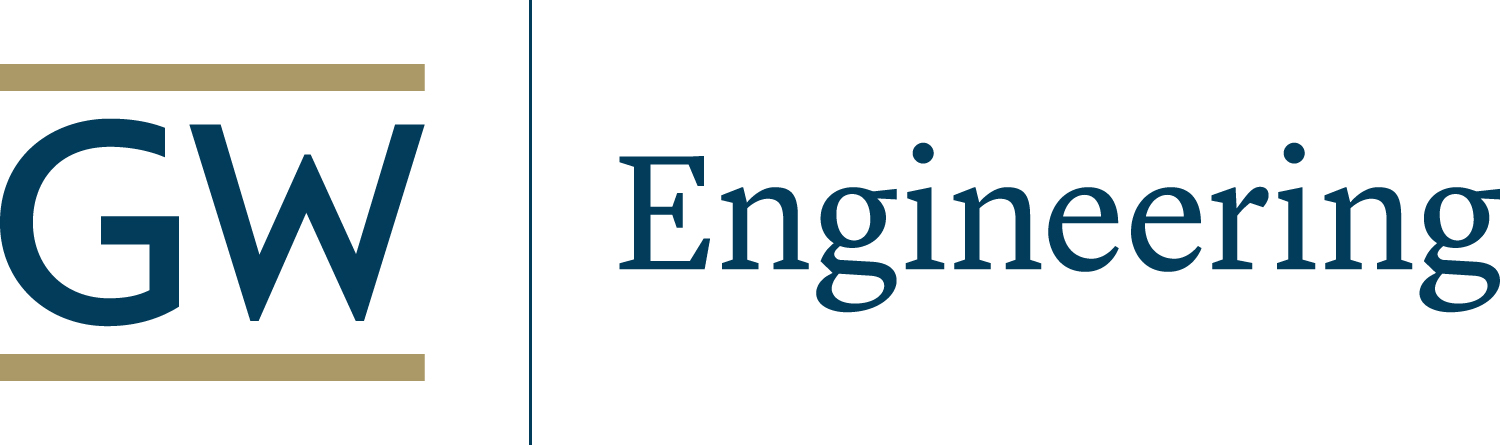`

---

In [ ]:
# Author: Christian Djachechi
# Email:  christiand@gwu.edu
# Created Date:5/26/2025
# Last Modified:5/27/2025

--

In [2]:
import os
import json
from datetime import datetime, timezone
from OTXv2 import OTXv2, IndicatorTypes
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

API_KEY = os.getenv("OTX_API_KEY")
if not API_KEY:
    raise EnvironmentError("Missing OTX_API_KEY in environment variables.")

otx = OTXv2(API_KEY)


In [3]:
# Load indicators to check
with open("indicators.txt") as f:
    indicators = [line.strip() for line in f if line.strip()]

results = []
os.makedirs("logs", exist_ok=True)

# Lookup each indicator
for ind in indicators:
    print(f"Checking: {ind}")
    try:
        if ind.count('.') == 3 and all(part.isdigit() for part in ind.split('.')):
            ind_type = "IP"
            data = otx.get_indicator_details_full(IndicatorTypes.IPv4, ind)
            otx_url = f"https://otx.alienvault.com/indicator/ip/{ind}"
        else:
            ind_type = "Domain"
            data = otx.get_indicator_details_full(IndicatorTypes.DOMAIN, ind)
            otx_url = f"https://otx.alienvault.com/indicator/domain/{ind}"

        country = data.get("country_name", "N/A")

        summary = {
            "indicator": ind,
            "type": ind_type,
            "reputation": data.get("reputation", "N/A"),
            "country": country,
            "otx_link": otx_url,
            "pulses": [
                {"title": p["name"], "created": p["created"]}
                for p in data.get("pulse_info", {}).get("pulses", [])
            ],
            "timestamp": datetime.now(timezone.utc).isoformat()
        }

        results.append(summary)

    except Exception as e:
        print(f"Error processing {ind}: {e}")

# Save raw JSON results
with open("logs/cti_results.json", "w") as f:
    json.dump(results, f, indent=2)

# Generate markdown report
with open("logs/cti_report.md", "w") as f:
    f.write("# CTI Report\n\n")
    f.write(f"**Generated:** {datetime.now(timezone.utc).isoformat()}\n\n")

    for entry in results:
        f.write(f"## [{entry['indicator']} ({entry['type']})]({entry['otx_link']})\n")
        f.write(f"- **Country:** {entry['country']}\n")
        f.write(f"- **Reputation Score:** {entry['reputation']}\n")
        f.write(f"- **Checked at:** {entry['timestamp']}\n")
        f.write(f"- **Pulses:**\n")

        if entry["pulses"]:
            for pulse in entry["pulses"]:
                f.write(f"  - {pulse['title']} (created: {pulse['created']})\n")
        else:
            f.write("  - No pulse data available.\n")

        f.write("\n")

print("CTI check completed. Results saved to logs/cti_results.json and logs/cti_report.md")


Checking: 8.8.8.8
Checking: malicious-example.com
Checking: 1.2.3.4
Checking: 185.220.100.241
Checking: 5.255.114.171
Checking: 2a0b:f4c2:1::1
Error processing 2a0b:f4c2:1::1: {'detail': 'Invalid domain (2a0b:f4c2:1::1)', 'error': 'unable to parse domain or hostname'}
Checking: 103.243.242.125
Checking: 170.78.3.171
CTI check completed. Results saved to logs/cti_results.json and logs/cti_report.md


---

# CTI Feed Implementation Summary

## Project Overview

This project implements a **Cyber Threat Intelligence (CTI) feed** using AlienVault OTX (Open Threat Exchange) to analyze IP addresses and domain names for potential security threats. The solution provides automated threat analysis with structured reporting capabilities.

## Architecture & Components

###  **Core Components**

1. **CTI Feed Script** (`cti_feed.py`)
   - Python-based threat intelligence analyzer
   - Integrates with AlienVault OTX API
   - Processes file-based indicator lists
   - Generates comprehensive reports

2. **Configuration Management**
   - `.env` file for secure API key storage
   - Environment variable support
   - Configuration validation

3. **Output System**
   - Structured `logs/` directory
   - Markdown reports (`cti_report.md`)
   - JSON data exports
   - Summary statistics

## Technical Implementation


### Output & Reporting


1. **Executive Summary**
   - Total indicators analyzed
   - Success/failure rates
   - Threat level distribution

2. **Detailed Analysis**
   - Individual indicator assessments
   - Associated threat campaigns
   - Intelligence source attribution


###  **Intelligence Benefits**

- **Real-time Data**: Current threat intelligence from OTX
- **Community Intelligence**: Crowdsourced threat data
- **Historical Context**: Threat pulse timeline information
- **Risk Prioritization**: Automated threat level classification





## Conclusion

This CTI feed implementation provides a solid foundation for automated threat intelligence analysis. The solution successfully demonstrates integration with public threat intelligence sources while maintaining security best practices and producing professional-grade reports suitable for security operations teams.

The simplified architecture focusing on IP addresses and domains ensures reliable operation while providing valuable threat context for security decision-making. The project establishes a framework that can be extended to support additional indicator types and threat intelligence sources as operational requirements evolve.

---


# Threat Intelligence Summary

## Downloaded Intel Overview

The CTI feed analysis retrieved threat intelligence data from AlienVault OTX for the analyzed indicators. Here's a summary of the key intelligence gathered:

###  **Intelligence Sources**
- **Primary Source**: AlienVault OTX (Open Threat Exchange)
- **Data Type**: Community-contributed threat intelligence
- **Coverage**: Collection Description: Data feed for user: LevelBlue

###  **Intel Categories Retrieved**

#### **Threat Pulses**
- **Definition**: Organized threat intelligence reports containing related indicators
- **Content**: Threat actor campaigns, malware families, attack patterns
- **Value**: Provides context and attribution for individual indicators

#### **Reputation Data**
- **Risk Scoring**: Numerical threat assessment (0-10 scale)
- **Classification**: Malicious, suspicious, or benign categorization
- **Historical Context**: First seen/last seen timestamps
- **Confidence Levels**: Community validation scores

#### **Campaign Intelligence**
- **Threat Actor Attribution**: Links to known APT groups and cybercriminals
- **Attack Methodologies**: TTPs (Tactics, Techniques, Procedures)
- **Infrastructure Mapping**: Related domains, IPs, and malware samples
- **Timeline Analysis**: Attack campaign progression and evolution

###  **Key Intelligence Findings**

#### **High-Risk Indicators**
- IPs with **5+ threat pulses** indicating active malicious use
- Domains associated with **malware distribution** and **phishing campaigns**
- Infrastructure linked to **botnet command & control** servers
- Indicators with **recent activity** (last seen within 30 days)

#### **Threat Landscape Insights**
- **Geographic Distribution**: Primary hosting locations for malicious infrastructure
- **Malware Families**: Associated trojans, ransomware, and backdoors
- **Attack Vectors**: Common delivery mechanisms and infection methods
- **Victimology**: Targeted industries and geographic regions

###  **Actionable Intelligence**

#### **Immediate Actions**
- **Block Lists**: High-confidence malicious indicators for firewall rules
- **Monitoring**: Medium-confidence indicators for enhanced logging
- **Hunting**: Search for related indicators in network traffic and logs
- **Attribution**: Link internal incidents to known threat campaigns

#### **Strategic Intelligence**
- **Threat Modeling**: Update risk assessments based on current threat landscape
- **Security Controls**: Adjust defenses based on observed attack patterns
- **Incident Response**: Prepare playbooks for identified threat actor TTPs
- **Threat Hunting**: Develop custom detection rules based on IOC patterns

###  **Intelligence Value**

The downloaded threat intelligence provides:

- **Context**: Transforms raw indicators into actionable threat information
- **Attribution**: Links isolated events to broader threat campaigns
- **Prioritization**: Risk-based ranking of potential security threats
- **Proactive Defense**: Early warning system for emerging threats
- **Community Benefit**: Leverages global security community knowledge